In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')

nltk.download('punkt')


from sklearn.pipeline import make_pipeline
import time



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sspc1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sspc1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [71]:
pip install emoji


SyntaxError: invalid syntax (3082291816.py, line 1)

In [73]:
pip install wordsegment

   ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.8 MB 653.6 kB/s eta 0:00:08
   -- ------------------------------------- 0.2/4.8 MB 3.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.6/4.8 MB 5.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.9/4.8 MB 5.9 MB/s eta 0:00:01
   ----------- ---------------------------- 1.4/4.8 MB 7.5 MB/s eta 0:00:01
   ----------------- ---------------------- 2.1/4.8 MB 8.8 MB/s eta 0:00:01
   ----------------- ---------------------- 2.1/4.8 MB 8.9 MB/s eta 0:00:01
   -------------------- ------------------- 2.5/4.8 MB 7.6 MB/s eta 0:00:01
   ---------------------------- ----------- 3.5/4.8 MB 9.3 MB/s eta 0:00:01
   -------------------------------------- - 4.6/4.8 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 4.8/4.8 MB 10.6 MB/s eta 0:00:00
Note: you may need to 

In [ ]:
pip install contractions

In [6]:
# Data loading using chunk size

reviews = pd.read_json('yelp_dataset/yelp_academic_dataset_review.json', lines=True, chunksize=20000)

# Iterate through chunks and process each one
chunk_list = []
for chunk in reviews:
    chunk_list.append(chunk)
    
# Concatenate the chunks after reading
reviews_df = pd.concat(chunk_list, ignore_index=True)


In [8]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [10]:
reviews_df.shape

(6990280, 9)

In [31]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [33]:
reviews_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

# Target Variable creation

In [12]:

# Creating the target variable (Positive, Negative, Neutral)
def label_review(stars):
    if stars >= 4:
        return '1'   # positive
    elif stars <= 2:
        return '-1'  # negative
    else:
        return '0'   # Neutral


reviews_df['sentiment'] = reviews_df['stars'].apply(label_review)

reviews_df.head()



,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1


# Preprocessing the 'text' columns
1. lowercasing
2. removing punctuation
3. Removing stop words
4. Negation handling  - Not, No, Never, None, n't
5. Expanding Contractions
6. Handling abbrevations
7. removing emojis and hashtags
8. Tokenization
9. Stemming - reducing the word to base form
gs

In [16]:
# Sampling 3% of the data
sampled_reviews = reviews_df.sample(frac=0.03, random_state=42)  


print(f"Sampled data size: {sampled_reviews.shape}")


Sampled data size: (209708, 10)


In [42]:
import re
import emoji
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordsegment import load, segment
import contractions  
import abbr  


load()


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def expand_contractions(text):
    
    return contractions.fix(text)



def clean_hashtags(text):
    
    hashtags = re.findall(r'#\w+', text)
    for hashtag in hashtags:
        words = ' '.join(segment(hashtag[1:]))  
        text = text.replace(hashtag, words)
    return text

def handle_negation(text):
    
    negation_patterns = re.compile(r'\b(?:not|no|never|none|n\'t)\b[\w\s]+[^\w\s]')
    return negation_patterns.sub(lambda match: '_'.join(match.group(0).split()), text)

def clean_text(text):
   
    # lowercase
    text = text.lower()

    # Expanding contractions
    text = expand_contractions(text)
    

    # negation
    text = handle_negation(text)

    # hashtags
    text = clean_hashtags(text)

    # emojis
    text = emoji.demojize(text)

    # punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)






sampled_reviews['final_cleaned_text'] = sampled_reviews['text'].apply(clean_text)



sampled_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,clean_text,neg_handled_text,final_cleaned_text
1295256,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,-1,went lunch found burger meh obviou focu burger...,went lunch found burger meh obviou focu burger...,went lunch found burger meh obviou focu burger...
3297618,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,1,need new tire wife car special order next day ...,need new tire wife car special order next day ...,need new tire wife car special order next day ...
1217795,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,1,jim woltman work goleta honda 5 star knowledg ...,jim woltman work goleta honda 5 star knowledg ...,jim woltman work goleta honda 5 star knowledg ...
3730348,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,1,time get shrimp theyv got nice select differ f...,time get shrimp theyv got nice select differ f...,time get shrimp got nice select differ fish pr...
1826590,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,1,one fantast place eat whether hungri need good...,one fantast place eat whether hungri need good...,one fantast place eat whether hungri need good...


In [50]:
sampled_reviews.reset_index(drop=True, inplace=True)

In [52]:
sampled_reviews.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,clean_text,neg_handled_text,final_cleaned_text
0,J5Q1gH4ACCj6CtQG7Yom7g,56gL9KEJNHiSDUoyjk2o3Q,8yR12PNSMo6FBYx1u5KPlw,2,1,0,0,Went for lunch and found that my burger was me...,2018-04-04 21:09:53,-1,went lunch found burger meh obviou focu burger...,went lunch found burger meh obviou focu burger...,went lunch found burger meh obviou focu burger...
1,HlXP79ecTquSVXmjM10QxQ,bAt9OUFX9ZRgGLCXG22UmA,pBNucviUkNsiqhJv5IFpjg,5,0,0,0,I needed a new tires for my wife's car. They h...,2020-05-24 12:22:14,1,need new tire wife car special order next day ...,need new tire wife car special order next day ...,need new tire wife car special order next day ...
2,JBBULrjyGx6vHto2osk_CQ,NRHPcLq2vGWqgqwVugSgnQ,8sf9kv6O4GgEb0j1o22N1g,5,0,0,0,Jim Woltman who works at Goleta Honda is 5 sta...,2019-02-14 03:47:48,1,jim woltman work goleta honda 5 star knowledg ...,jim woltman work goleta honda 5 star knowledg ...,jim woltman work goleta honda 5 star knowledg ...
3,U9-43s8YUl6GWBFCpxUGEw,PAxc0qpqt5c2kA0rjDFFAg,XwepyB7KjJ-XGJf0vKc6Vg,4,0,0,0,Been here a few times to get some shrimp. The...,2013-04-27 01:55:49,1,time get shrimp theyv got nice select differ f...,time get shrimp theyv got nice select differ f...,time get shrimp got nice select differ fish pr...
4,8T8EGa_4Cj12M6w8vRgUsQ,BqPR1Dp5Rb_QYs9_fz9RiA,prm5wvpp0OHJBlrvTj9uOg,5,0,0,0,This is one fantastic place to eat whether you...,2019-05-15 18:29:25,1,one fantast place eat whether hungri need good...,one fantast place eat whether hungri need good...,one fantast place eat whether hungri need good...
5,18E_haOfOm8ks-A7SlVWRg,bnDZpsii_if2_wpn8oPcig,bK0j7YtVyN98UnM_8fUONg,3,1,1,1,Dirt cheap happy hour specials. Half priced d...,2011-11-08 01:30:27,0,dirt cheap happi hour special half price drink...,dirt cheap happi hour special half price drink...,dirt cheap happi hour special half price drink...
6,8rD5LvgHVPSnyyae4ji4dA,YxpJDf6Idn7MA9E003B0Zw,zLIrhVc1nfPTOF33eFD4_g,1,4,1,0,"Unbelievably poor customer ""service"". Beyond ...",2011-05-15 22:58:44,-1,unbeliev poor custom servic beyond bad insist ...,unbeliev poor custom servic beyond bad insist ...,unbeliev poor custom servic beyond bad insist ...
7,hYYN8bWKRW29qqdpaKOdMg,8H183Gq4be1PqKBW7jbIiA,KHl171eshtTPrGyBWGEHQQ,5,1,0,0,I walked in the door and was greeted with a we...,2015-05-24 11:48:33,1,walk door greet welcom smile offer help find g...,walk door greet welcom smile offer help find g...,walk door greet welcom smile offer help find g...
8,xQVDB9xRdpLmPh9XMQ6Gvg,yy38DH7ENFTJ10-d4GUlig,S26FJcC298XNpN2cZiwOrA,5,0,0,0,Nothing beats pizza and beer in my book. This ...,2012-12-24 02:18:18,1,noth beat pizza beer book place nail eye towar...,noth beat pizza beer book place nail eye towar...,noth beat pizza beer book place nail eye towar...
9,c7IQ5alG0pl9yCITtsIlrA,ZLKpeCqbCMWfNeT6yU8wUQ,zT2OzXDWKK1abapHs2RUrQ,5,1,0,0,Philly cheese steak (loaded) was phenomenal. ...,2021-07-02 02:17:40,1,philli chees steak load phenomen good servic v...,philli chees steak load phenomen good servic v...,philli chees steak load phenomen good servic v...


In [54]:
sampled_reviews.shape

(209708, 13)

# Train-test split

In [56]:

x_train, x_test, y_train, y_test = train_test_split(sampled_reviews['final_cleaned_text'], sampled_reviews['sentiment'], test_size=0.2, stratify=sampled_reviews['sentiment'], random_state=42)


print(y_train.value_counts())

sentiment
1     112467
-1     38654
0      16645
Name: count, dtype: int64


In [60]:
x_train.head

181428    best pizza st pete opinion kind upset took lon...
32644     first thing need know pinewood social extrem i...
55173     food pretti good got meal grill beyond eat not...
204776    flowmast 44 put charger right bought figur bou...
73757     got number 11 omg sam made tast differ 30 year...
Name: final_cleaned_text, dtype: object

# saving files

In [68]:
x_train.to_csv( 'x_train_ml2',index=False)
y_train.to_csv( 'y_train_ml2',index=False)
x_test.to_csv('x_test_ml2',index=False)
y_test.to_csv('y_test_ml2',index=False)

# Vectorization -  Unigram Count Vectorizer

In [70]:

count_vectorizer_unigram = CountVectorizer(ngram_range=(1, 1), max_features=5000, max_df=0.9,min_df=5)


x_train_count_unigram = count_vectorizer_unigram.fit_transform(x_train)
x_test_count_unigram = count_vectorizer_unigram.transform(x_test)


In [82]:
x_train_count_unigram.shape

(167766, 5000)

In [80]:

feature_names = count_vectorizer_unigram.get_feature_names_out()

x_train_count_unigram_df = pd.DataFrame(x_train_count_unigram.toarray(), columns=feature_names)


x_train_count_unigram_df.head()


,10,100,1000,1010,1015,1030,10am,10pm,10th,11,...,yr,yuck,yum,yummi,yup,zero,zip,zone,zoo,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# One-Hot Unigram Vectorizer 

In [ ]:

one_hot_vectorizer_unigram = CountVectorizer(ngram_range=(1, 1), binary=True,max_features=5000)


x_train_onehot_unigram = one_hot_vectorizer_unigram.fit_transform(x_train)
x_test_onehot_unigram = one_hot_vectorizer_unigram.transform(x_test)


# Class separability check on Unigram Count vectorizer 


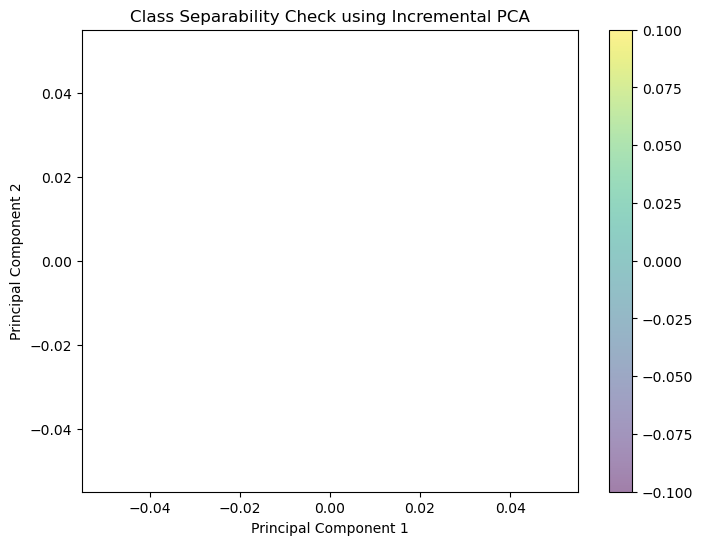

In [92]:
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np





ipca = IncrementalPCA(n_components=2)

batch_size = 1000


for i in range(0, x_train_count_unigram.shape[0], batch_size):
    ipca.partial_fit(x_train_count_unigram[i:i + batch_size].toarray())


x_train_pca = np.empty((x_train_count_unigram.shape[0], 2))

for i in range(0, x_train_count_unigram.shape[0], batch_size):
    x_train_pca[i:i + batch_size] = ipca.transform(x_train_count_unigram[i:i + batch_size].toarray())



Mapped unique values after conversion: [2 0 1]


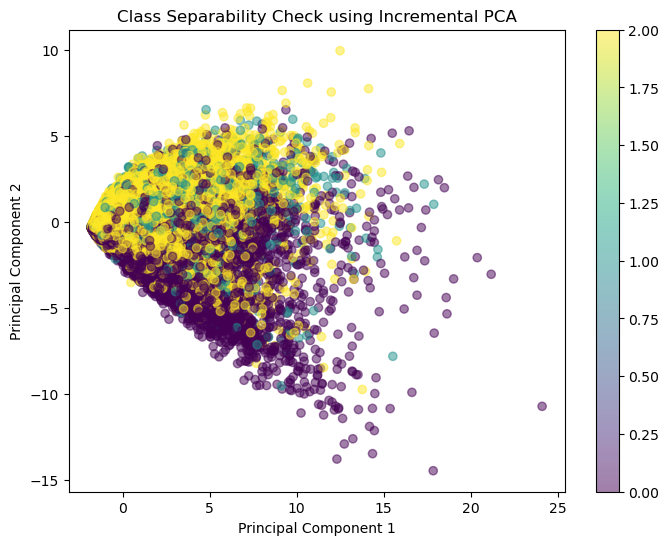

In [102]:

y_train_numeric = pd.to_numeric(y_train, errors='coerce')  


color_map = {1: 2, 0: 1, -1: 0} 
y_train_mapped = y_train_numeric.map(color_map)


print("Mapped unique values after conversion:", y_train_mapped.unique())


if y_train_mapped.isnull().any():
    print("Warning: There are NaN values in y_train_mapped.")


plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_mapped, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('Class Separability Check using Incremental PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Numerical Features
1. Cool
2. useful

# Run below cell after vectorization for adding above mentioned features

In [115]:

from scipy.sparse import hstack


x_train_combined = hstack([
    x_train_count_unigram,
    sampled_reviews.loc[x_train.index, ['useful', 'cool']].values
])

x_test_combined = hstack([
    x_test_count_unigram,
    sampled_reviews.loc[x_test.index, ['useful', 'cool']].values
])


In [121]:
print(x_train_combined.shape)
print(x_test_combined.shape)

(559222, 5002)
(139806, 5002)



# 1.Before Splitting data

 1. Data loading and initial exploration
 2. Sampled 3% of data 
 3. Data cleaning (handling of negations, stop words, stemming, contractions)

  

# 2.Train and Test Split

# 3.Vectorization 
Did
1. Unigram count vectorization
2. please apply different vectorization techniques according to your tasks and assignment.


# 3.Class Separability 
1. For Unigram count vectorizer, class seperability is not that good.


# 4.Numerical Features Added

1. cool
2. useful


# 5.Feature Set with Best Separability

Need to do unigram + bigram 
